In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))

In [14]:
import pandas as pd
from scripts.quantitative_analysis import QuantitativeAnalysis
import yfinance as yf


- **Load and prepare the data**

In [ ]:
df=pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")

In [4]:
print(df.shape)

(10998, 9)


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [15]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI,MACD,MACD_Signal,MACD_Hist
count,10998,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000,10979.000000,10984.000000,10965.000000,10965.000000,10965.000000
mean,2002-09-26 14:14:28.085106304,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546,22.157875,53.119636,0.139020,0.137452,0.001568
min,1980-12-12 00:00:00,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000,0.055999,15.346105,-6.673117,-5.815683,-2.510773
25%,1991-10-28 06:00:00,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000,0.300642,43.465694,-0.007107,-0.006533,-0.004187
50%,2002-09-23 12:00:00,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000,0.530273,52.980476,0.003685,0.003666,0.000123
75%,2013-08-25 06:00:00,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000,20.059625,62.755369,0.065976,0.063689,0.005688
max,2024-07-30 00:00:00,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000,225.117001,91.502574,8.948060,8.310411,2.379293
std,NaN,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663,45.662784,13.040051,1.013181,0.955654,0.292496


- Instantiate a `QuantitativeAnalysis` object

In [34]:
qa = QuantitativeAnalysis(df,"AAPL")
qa.change_to_datetime()

- **Apply Analysis Indicators with TA-Lib**

In [35]:
qa.calculate_indicators()

- **Use yfinance for Financial Metrics**

In [37]:
qa.get_financial_metrics()

,Value
Market Cap,3.035725e+12
Trailing P/E,3.165913e+01
Forward P/E,2.445867e+01
Beta,1.211000e+00
Dividend Yield,5.100000e-01


- **Visualize the Data**

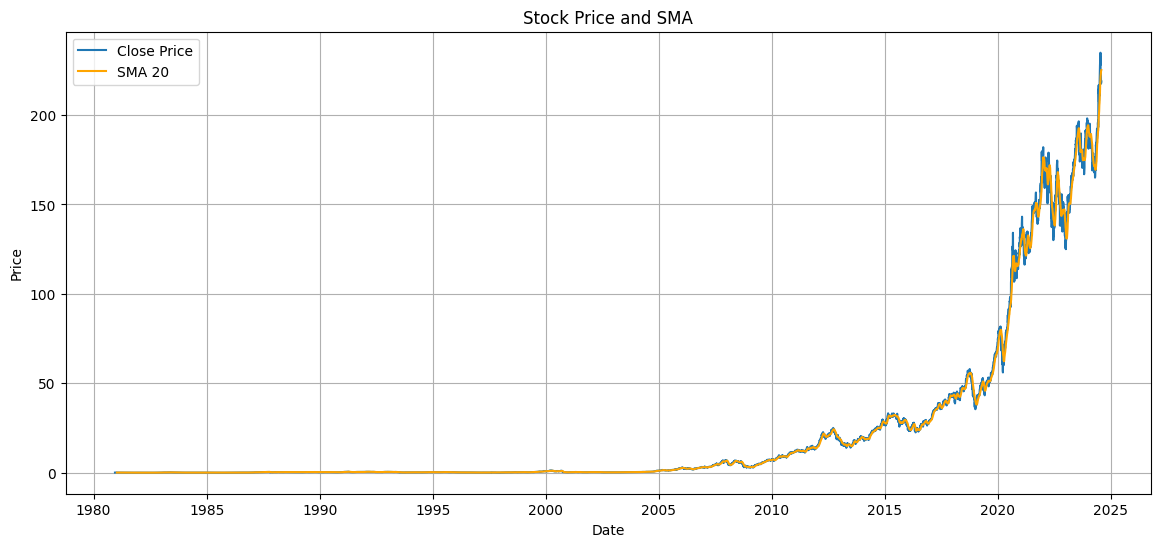

In [11]:
qa.plot_close_and_SMA()

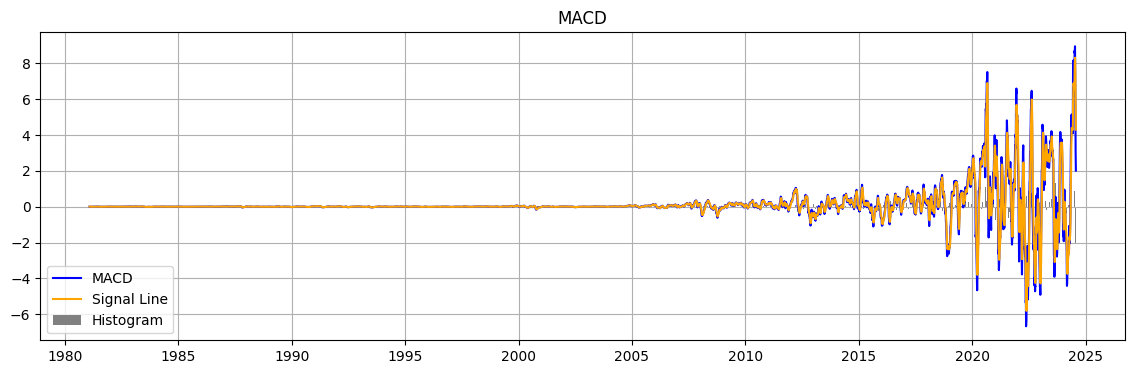

In [12]:
qa.plot_MACD()

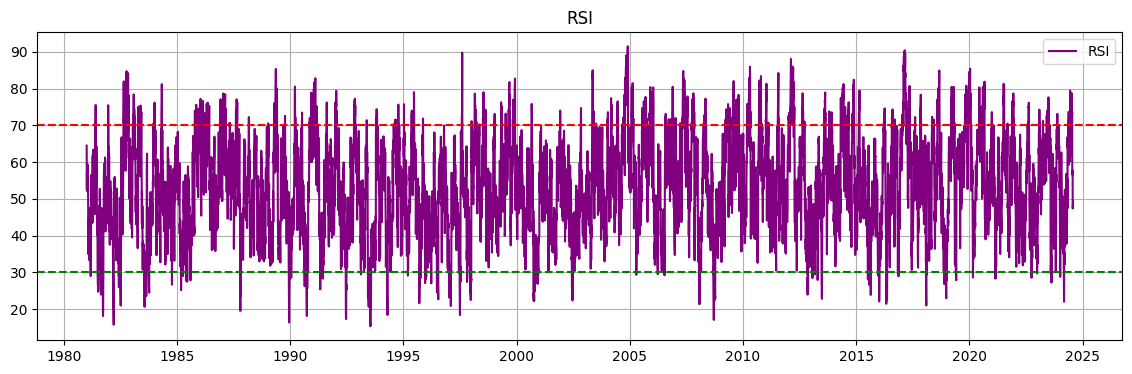

In [13]:
qa.plot_RSI()